
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - Machine Learning & Classification <br>
<font color=696880 size=4>
Mahan Bayhaghi & Arash Ziyaei Razban


____

## Personal Data

In [23]:
student_number = '401105601'
Name = 'Mahdi'
Last_Name = 'Akbari'

## Logistic Regression (50 points)

In this notebook, we will explore the fundamentals of classification in machine learning by implementing Logistic Regression from scratch, step by step.

#### Libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

### From scratch implementation (20 points)

- **Sigmoid Function**: Logistic Regression models the probability of a class label as:  
  
  $$
  P(y=1|X) = \sigma(z) = \frac{1}{1 + e^{-z}}, \quad z = X \cdot w
  $$

  where $ w $ is the weight vector, $ X $ is the feature matrix, and $ \sigma(z) $ maps the input to a value between 0 and 1.

- **Binary Cross-Entropy Loss**: To train the model, we minimize the binary cross-entropy loss:  

  $$
  \mathcal{L} = -\frac{1}{n} \sum_{i=1}^n \Big[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \Big]
  $$  

  Here, $ y_i $ is the true label, and $ \hat{y}_i $ is the predicted probability.

- **Gradient Descent (GD)**: To optimize the weights, we use Gradient Descent, an iterative algorithm that updates the weights in the direction of the negative gradient of the loss:  

  $$
  w \gets w - \alpha \cdot \nabla \mathcal{L}
  $$  

  where $ \alpha $ is the learning rate and $ \nabla \mathcal{L} $ is the gradient.



The class `LogisticRegressionGD` implements logistic regression with the following features:
- Binary classification using the sigmoid function.
- Training using gradient descent with a configurable learning rate, number of steps, and convergence tolerance.
- Validation accuracy tracking and loss history for monitoring training progress.
- Prediction capability and a confusion matrix visualization.

Let’s now implement this step by step and evaluate its performance on a classification dataset.

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class LogisticRegressionGD:
    def __init__(self, learning_rate=0.1, n_steps=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.n_steps = n_steps
        self.tolerance = tolerance
        self.weights = None
        self.loss_history = []
        self.validation_accuracy_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        m = X.shape[0]
        predictions = self.sigmoid(np.dot(X, self.weights))
        loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        return loss

    def compute_gradient(self, X, y):
        m = X.shape[0]
        predictions = self.sigmoid(np.dot(X, self.weights))
        gradient = np.dot(X.T, (predictions - y)) / m
        return gradient
    
    def test_accuracy(self, X_test, y_test):
        predictions = self.predict(X_test)
        accuracy = np.mean(predictions == y_test)
        return accuracy

    def fit(self, X_train, y_train, X_val=None, y_val=None):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)

        for step in range(self.n_steps):
            gradient = self.compute_gradient(X_train, y_train)
            self.weights -= self.learning_rate * gradient

            # Compute and store the loss
            loss = self.compute_loss(X_train, y_train)
            self.loss_history.append(loss)

            # Check for convergence
            if np.linalg.norm(gradient) < self.tolerance:
                print(f"Convergence reached at step {step}.")
                break

            if X_val is not None and y_val is not None and step % 100 == 0:
                val_loss = self.compute_loss(X_val, y_val)
                val_accuracy = self.test_accuracy(X_val, y_val)
                self.validation_accuracy_history.append(val_accuracy)
                print(f"Step {step}: Training Loss = {loss}, Validation Loss = {val_loss}, Validation Accuracy = {val_accuracy}")


    def predict(self, X):
        probabilities = self.sigmoid(np.dot(X, self.weights))
        return (probabilities >= 0.5).astype(int)

    def plot_confusion_matrix(self, X_val, y_val, labels):
        y_pred = self.predict(X_val)
        cm = confusion_matrix(y_val, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp.plot(cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.show()


Now that you have implemented the Logistic Regression class, let's test it on a sample dummy dataset and visualize the decision boundary:

Step 0: Training Loss = 0.5986361389694155, Validation Loss = 0.6011862392087293, Validation Accuracy = 1.0
Step 100: Training Loss = 0.12064926043581854, Validation Loss = 0.08455208437223019, Validation Accuracy = 1.0
Step 200: Training Loss = 0.1064728558026429, Validation Loss = 0.06412256752721013, Validation Accuracy = 1.0
Step 300: Training Loss = 0.10157390687425476, Validation Loss = 0.05675873296293599, Validation Accuracy = 1.0
Step 400: Training Loss = 0.09914654477857944, Validation Loss = 0.05287200160973127, Validation Accuracy = 1.0
Step 500: Training Loss = 0.09771983294920511, Validation Loss = 0.050363387100857936, Validation Accuracy = 1.0
Step 600: Training Loss = 0.09678958264874676, Validation Loss = 0.048525687127587466, Validation Accuracy = 1.0
Step 700: Training Loss = 0.09613836012215408, Validation Loss = 0.04706251960065662, Validation Accuracy = 1.0
Step 800: Training Loss = 0.09565811178055965, Validation Loss = 0.04583145432219509, Validation Accuracy =

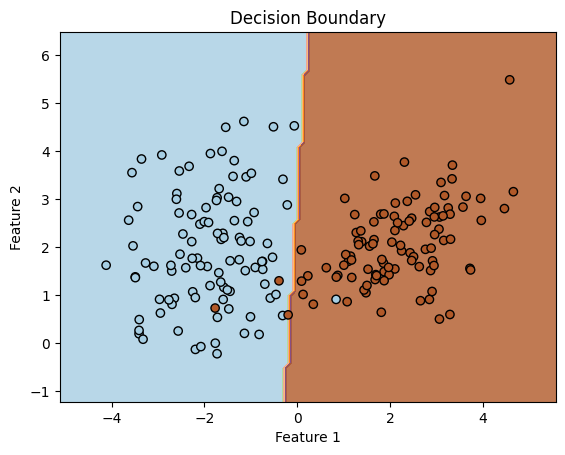

Validation Accuracy: 1.0000


In [26]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a dummy linearly separable binary dataset
X, y = make_classification(
    n_samples=200, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    flip_y=0, 
    class_sep=2, 
    random_state=42
)

# Add a bias term to X for intercept
X = np.c_[np.ones(X.shape[0]), X]

# Split the dataset into training and validation sets
split_index = int(0.8 * len(X))
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

# Train the Logistic Regression model
model = LogisticRegressionGD(learning_rate=0.1, n_steps=1000, tolerance=1e-6)
model.fit(X_train, y_train, X_val, y_val)

# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    # Generate a grid of points
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict on the grid
    grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 1], X[:, 2], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Call the function to visualize
plot_decision_boundary(model, X, y)

# Test accuracy on validation set
val_accuracy = model.test_accuracy(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")


### Towards real numerical datasets (15 points)

With our tools ready, we'll now work with the Breast Cancer dataset from scikit-learn—a classic binary classification dataset commonly used in machine learning. This dataset includes various features describing tumors, along with their corresponding labels (benign or malignant).

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

df = pd.read_csv("bank.csv", delimiter=";")

print(df.head())


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


As you are familiar with, adding bias term 1 is necessary as well:

In [28]:
# Separate features and target
X = df.drop(columns=["y"])  # Feature matrix
y = (df["y"] == "yes").astype(int).values  # Convert "yes"/"no" target to binary

# Identify categorical columns
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

# Apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_columns)], remainder="passthrough"
)

X = preprocessor.fit_transform(X)

X = np.hstack((np.ones((X.shape[0], 1)), X))  # Convert sparse matrix to dense if necessary

# Scale numeric features (excluding bias column)
X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)

# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3616, 52)
X_test shape: (905, 52)
y_train shape: (3616,)
y_test shape: (905,)


Since the dataset has a high number of features, we will use dimensionality reduction to make it easier to visualize. For this purpose, we will apply Principal Component Analysis (PCA):

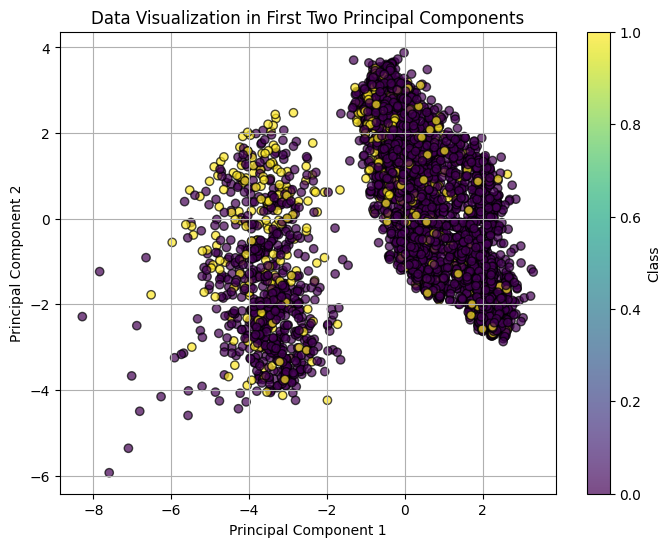

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", edgecolor="k", alpha=0.7)
plt.colorbar(scatter, label="Class")
plt.title("Data Visualization in First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

Finally, we will train the Logistic Regression model on this dataset. We will visualize the loss reduction during training and evaluate the model's performance using a confusion matrix:

Step 0: Training Loss = 0.6739647378214951, Validation Loss = 0.674202498999543, Validation Accuracy = 0.876243093922652
Step 100: Training Loss = 0.28076138009512197, Validation Loss = 0.28668836779617207, Validation Accuracy = 0.9005524861878453
Step 200: Training Loss = 0.2519177059019296, Validation Loss = 0.2615621918205828, Validation Accuracy = 0.9027624309392265
Step 300: Training Loss = 0.24415349708803313, Validation Loss = 0.256504974333118, Validation Accuracy = 0.9027624309392265
Step 400: Training Loss = 0.24112834760078308, Validation Loss = 0.25533873689291026, Validation Accuracy = 0.901657458563536
Step 500: Training Loss = 0.23972210683084133, Validation Loss = 0.25521640841884735, Validation Accuracy = 0.901657458563536
Step 600: Training Loss = 0.2389962273578408, Validation Loss = 0.2553911778509013, Validation Accuracy = 0.901657458563536
Step 700: Training Loss = 0.23859458238984182, Validation Loss = 0.2556306745386547, Validation Accuracy = 0.9005524861878453


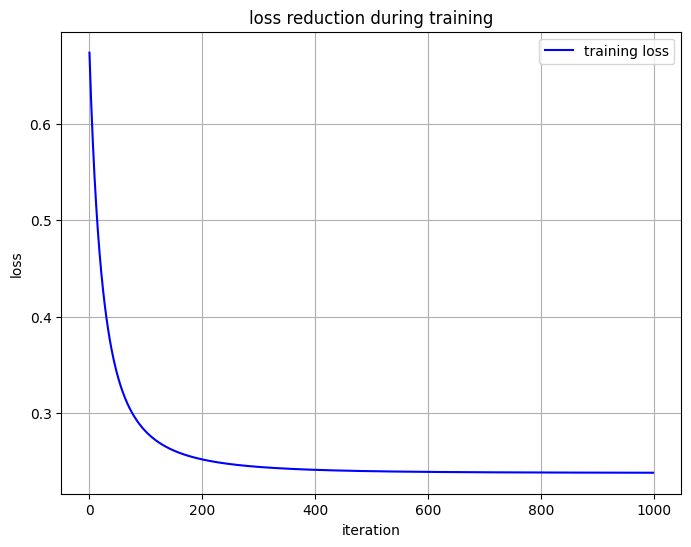

validation accuracy: 0.90


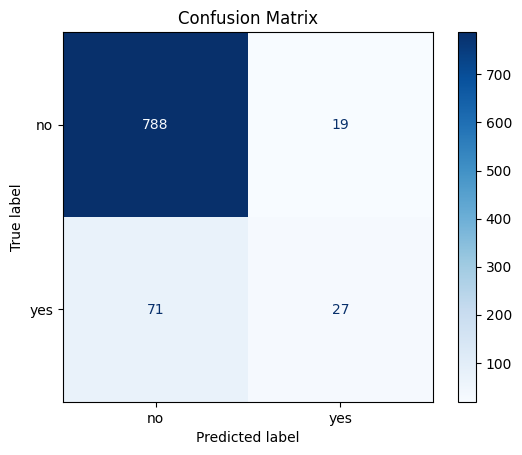

In [30]:
log_reg = LogisticRegressionGD(learning_rate=0.1, n_steps=1000, tolerance=1e-6)

# train model
log_reg.fit(X_train, y_train, X_val=X_test, y_val=y_test)

# loss reduction during training
plt.figure(figsize=(8, 6))
plt.plot(log_reg.loss_history, label="training loss", color="blue")
plt.title("loss reduction during training")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.legend()
plt.grid(True)
plt.show()

val_accuracy = log_reg.test_accuracy(X_test, y_test)
print(f"validation accuracy: {val_accuracy:.2f}")

log_reg.plot_confusion_matrix(X_test, y_test, labels=["no", "yes"])


Step 0: Training Loss = 0.6739647378214951, Validation Loss = 0.674202498999543, Validation Accuracy = 0.876243093922652
Step 100: Training Loss = 0.28076138009512197, Validation Loss = 0.28668836779617207, Validation Accuracy = 0.9005524861878453
Step 200: Training Loss = 0.2519177059019296, Validation Loss = 0.2615621918205828, Validation Accuracy = 0.9027624309392265
Step 300: Training Loss = 0.24415349708803313, Validation Loss = 0.256504974333118, Validation Accuracy = 0.9027624309392265
Step 400: Training Loss = 0.24112834760078308, Validation Loss = 0.25533873689291026, Validation Accuracy = 0.901657458563536
Step 500: Training Loss = 0.23972210683084133, Validation Loss = 0.25521640841884735, Validation Accuracy = 0.901657458563536
Step 600: Training Loss = 0.2389962273578408, Validation Loss = 0.2553911778509013, Validation Accuracy = 0.901657458563536
Step 700: Training Loss = 0.23859458238984182, Validation Loss = 0.2556306745386547, Validation Accuracy = 0.9005524861878453


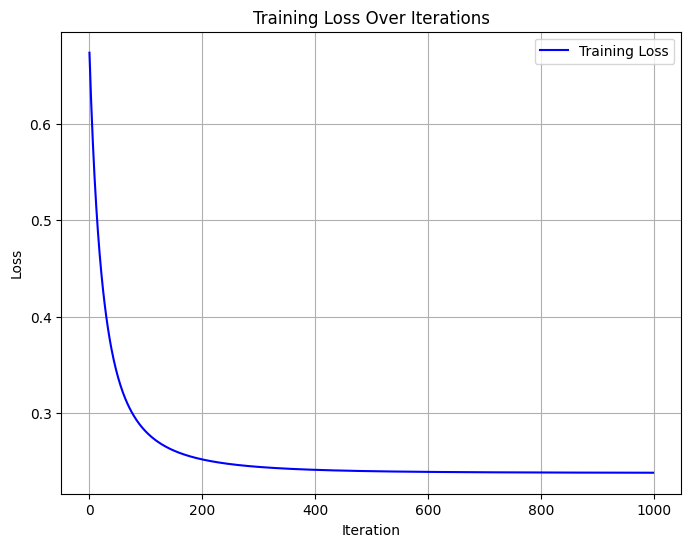

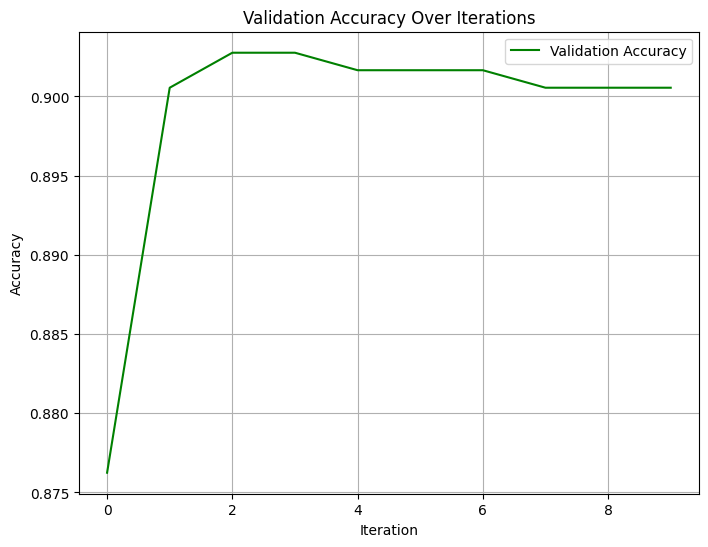

In [31]:
log_reg = LogisticRegressionGD(learning_rate=0.1, n_steps=1000, tolerance=1e-6)
log_reg.fit(X_train, y_train, X_val=X_test, y_val=y_test)

#loss over iterations
plt.figure(figsize=(8, 6))
plt.plot(log_reg.loss_history, label="Training Loss", color="blue")
plt.title("Training Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(log_reg.validation_accuracy_history, label="Validation Accuracy", color="green")
plt.title("Validation Accuracy Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

**Why does the validation accuracy show a slight decrease? The slight decrease in validation accuracy could occur due to overfitting or natural fluctuations during training. Early in training, the model learns general patterns, improving both training and validation performance. As training progresses, the model may begin to overfit the training data, capturing noise or specific details that do not generalize well to unseen data, causing validation accuracy to decrease. Additionally, stochasticity in gradient descent and class imbalances can contribute to temporary accuracy fluctuations**

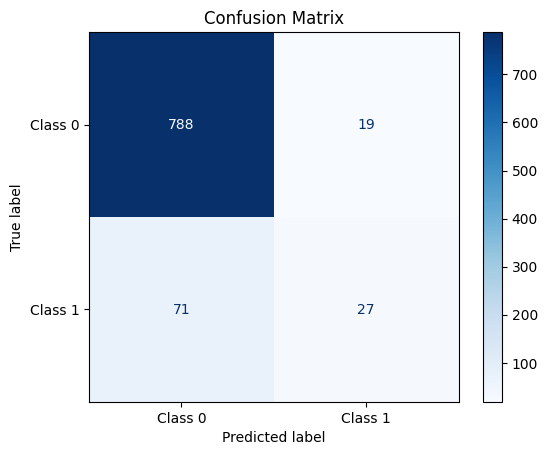

In [32]:
def plot_confusion_matrix(log_reg, X_test, y_test, labels=["Class 0", "Class 1"]):
    y_pred = log_reg.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(log_reg, X_test, y_test)

### Towards real non-numerical datasets (15 points)

Up to this point, you have successfully implemented Logistic Regression from scratch and applied it to a numerical dataset (the Breast Cancer dataset, where all features were numerical).

Now, let’s take it a step further by applying your classifier to a non-numerical dataset. We will use the [Rotten Tomatoes Reviews dataset](https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset), a popular dataset for sentiment analysis. This dataset contains movie reviews categorized into two classes: 'rotten' and 'fresh', representing binary sentiment classification.

To work with this dataset, we will first create embedding vectors for the text data. These embeddings will numerically represent each review and allow us to classify them based on their content. The focus will be on building meaningful embeddings that capture the essence of the reviews and using Logistic Regression to perform sentiment classification.

If you're using Google Colab, you can use the following cells to download and unzip the dataset directly. Alternatively, you may choose to download and extract it manually on your device

In [33]:
# import os

# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset
# !unzip rotten-tomatoes-movies-and-critic-reviews-dataset.zip

import kagglehub

# Download latest version
path = kagglehub.dataset_download("stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\mahdi.ak\.cache\kagglehub\datasets\stefanoleone992\rotten-tomatoes-movies-and-critic-reviews-dataset\versions\1


#### Requierments
Please make sure that NLTK is available before proceeding to the next cells

In [34]:
!pip install nltk


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Libraries

In [35]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from collections import defaultdict

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mahdi.ak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mahdi.ak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahdi.ak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mahdi.ak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Since the dataset is quite large, we will focus on a subset of the data by selecting only reviews from top critics and movies with non-NaN review scores. Let's load this subset into a DataFrame and display the first couple of rows

Available columns in the dataset:
Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content'],
      dtype='object')

Unique values in the 'top_critic' column:
[False  True]

First few rows of the filtered dataset:
                rotten_tomatoes_link       critic_name  top_critic  \
318159        m/emperors_new_clothes      Lou Lumenick        True   
860006  m/springtime-in-a-small-town  Lisa Schwarzbaum        True   
635732              m/overboard_2018    Peter Hartlaub        True   
453744              m/innocent_blood       Roger Ebert        True   
986257            m/the_letters_2015    Soren Andersen        True   

                 publisher_name review_type review_score review_date  \
318159            New York Post       Fresh        2.5/4  2002-06-14   
860006     Entertainment Weekly       Fresh           B+  2004-05-12   
635732  San Francisco Chronicle      Rotten          1/4  2

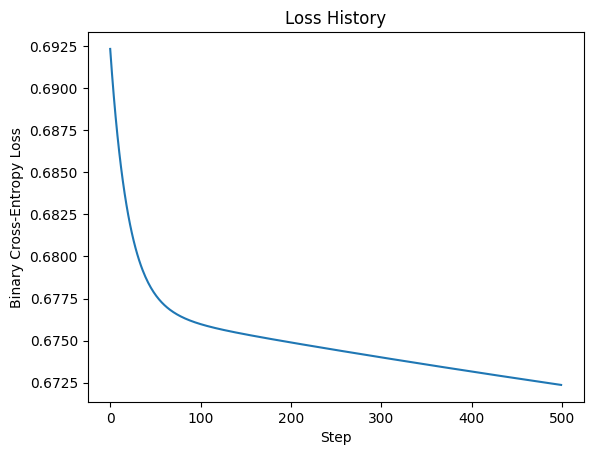

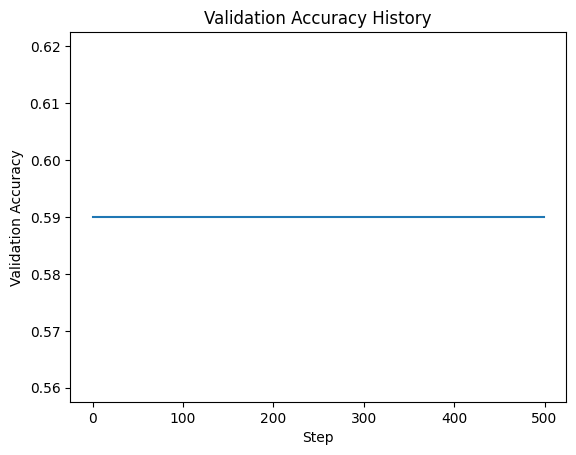

Validation accuracy: 59.00%


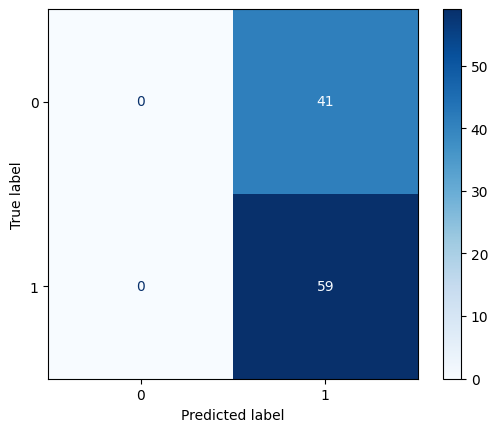

In [36]:
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


# Load the Rotten Tomatoes Reviews dataset
reviews = pd.read_csv("rotten_tomatoes_critic_reviews.csv")

# Display the available columns in the dataset
print("Available columns in the dataset:")
print(reviews.columns)

# Check the unique values in the 'top_critic' column
print("\nUnique values in the 'top_critic' column:")
print(reviews['top_critic'].unique())

# Filter out reviews with non-NaN review content and review scores from top critics
filtered_reviews = reviews.dropna(subset=['review_content', 'review_score'])
filtered_reviews = filtered_reviews[filtered_reviews['top_critic'] == True]

# Limit the dataset size to 500 samples
filtered_reviews = filtered_reviews.sample(n=500, random_state=42)

# Display the first few rows of the filtered dataset
print("\nFirst few rows of the filtered dataset:")
print(filtered_reviews.head())

# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]
    # Join tokens back to string
    return ' '.join(tokens)

# Apply preprocessing to the review content
filtered_reviews['cleaned_review'] = filtered_reviews['review_content'].apply(preprocess_text)

# Display the first few rows of the cleaned data
print("\nFirst few rows of the cleaned data:")
print(filtered_reviews[['review_content', 'cleaned_review']].head())

# Convert labels to binary format: 'fresh' -> 1, 'rotten' -> 0
filtered_reviews['label'] = filtered_reviews['review_type'].apply(lambda x: 1 if x == 'Fresh' else 0)

# Vectorize the cleaned review content using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Reduce the number of features to 1000
X = vectorizer.fit_transform(filtered_reviews['cleaned_review'])

# Convert labels to numpy array
y = filtered_reviews['label'].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the sparse matrix to a dense format
X_train = X_train.toarray()
X_test = X_test.toarray()

# Add the bias term (intercept) by adding a column of ones
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Define the LogisticRegressionGD class
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.1, n_steps=500, tolerance=1e-6):  # Reduce the number of steps to 500
        self.learning_rate = learning_rate
        self.n_steps = n_steps
        self.tolerance = tolerance
        self.weights = None
        self.loss_history = []
        self.val_accuracy_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        y_pred = self.sigmoid(np.dot(X, self.weights))
        n = len(y)
        loss = -1/n * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss

    def compute_gradient(self, X, y):
        y_pred = self.sigmoid(np.dot(X, self.weights))
        gradient = np.dot(X.T, (y_pred - y)) / len(y)
        return gradient

    def test_accuracy(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        return accuracy

    def fit(self, X_train, y_train, X_val, y_val):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)

        for step in range(self.n_steps):
            gradient = self.compute_gradient(X_train, y_train)
            self.weights -= self.learning_rate * gradient

            # Compute validation loss and accuracy for tracking
            loss = self.compute_loss(X_val, y_val)
            accuracy = self.test_accuracy(X_val, y_val)
            self.loss_history.append(loss)
            self.val_accuracy_history.append(accuracy)

            # Print loss and accuracy at intervals
            if step % 100 == 0:
                print(f'Step {step}: Loss = {loss:.4f}, Validation Accuracy = {accuracy:.4f}')

            # Check for convergence
            if step > 0 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tolerance:
                print(f'Converged at step {step}')
                break

    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X, self.weights))
        return (y_pred >= 0.5).astype(int)

    def plot_confusion_matrix(self, X_val, y_val, labels):
        y_pred = self.predict(X_val)
        cm = confusion_matrix(y_val, y_pred, labels=labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp.plot(cmap=plt.cm.Blues)
        plt.show()

# Train the Logistic Regression model
model = LogisticRegressionGD(learning_rate=0.1, n_steps=500, tolerance=1e-6)  # Reduce the number of steps to 500
model.fit(X_train, y_train, X_test, y_test)

# Plot the loss history
plt.plot(model.loss_history)
plt.xlabel('Step')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Loss History')
plt.show()

# Plot the validation accuracy history
plt.plot(model.val_accuracy_history)
plt.xlabel('Step')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy History')
plt.show()

# Evaluate the model
accuracy = model.test_accuracy(X_test, y_test)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

# Plot the confusion matrix
model.plot_confusion_matrix(X_test, y_test, labels=[0, 1])


To work with the text data, we need to preprocess it. For simplicity, we will perform the following preprocessing steps:
- Convert the text to lowercase
- Remove non-English characters
- Eliminate common English stopwords
- Apply lemmatization using NLTK

Since the dataset is quite large, performing this preprocessing on the CPU may take some time. If you have access to a GPU (either through Google Colab or your local device), we recommend setting the runtime_env to GPU for faster preprocessing. This will significantly speed up the process!

In [37]:
runtime_env = 'GPU' # or CPU

In [38]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

if runtime_env == 'GPU':
  import cudf
  import cupy as cp

  def preprocess_text_gpu(text_series):
      text_series = cudf.Series(text_series)
      text_series = text_series.str.lower()
      text_series = text_series.str.replace(r'[^a-z\s]', '', regex=True)
      text_series = text_series.to_pandas()

      processed_texts = []
      for text in text_series:
          tokens = word_tokenize(text)
          tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
          processed_texts.append(' '.join(tokens))
      return processed_texts

  reviews['processed_content'] = preprocess_text_gpu(reviews['review_content'].astype(str))

elif runtime_env == 'CPU':
  def preprocess_text(text):
      text = text.lower()
      text = re.sub(r'[^a-z\s]', '', text)
      tokens = word_tokenize(text)
      tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
      return ' '.join(tokens)

  reviews['processed_content'] = reviews['review_content'].astype(str).apply(preprocess_text)

print(reviews[['review_type', 'review_content', 'processed_content']].head())

ModuleNotFoundError: No module named 'cudf'

Next, let’s visualize the distribution of the classes in the dataset.

This will help us determine whether the data is balanced between the two classes ('rotten' and 'fresh') or if there is an imbalance that might affect our model's performance.

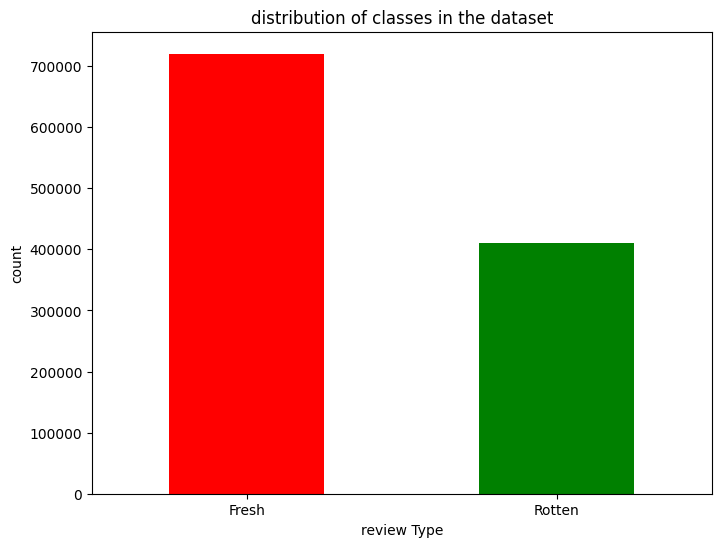

class distribution:
 review_type
Fresh     720210
Rotten    409807
Name: count, dtype: int64


In [39]:
import matplotlib.pyplot as plt

class_counts = reviews['review_type'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['red', 'green'])
plt.title('distribution of classes in the dataset')
plt.xlabel('review Type')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

print("class distribution:\n", class_counts)


In sentiment analysis, we often face the challenge of working with non-numerical data, such as text. To address this, we use [embeddings](https://www.geeksforgeeks.org/what-are-embeddings-in-machine-learning/). An embedding is a method for converting non-numerical data (like words or sentences) into numerical vectors, which can be processed by machine learning algorithms.

Embeddings can be fixed-size or variable-length, and there are many techniques to create them. Some embeddings, like GloVe and Word2Vec, are based on the context of words in a corpus. These methods capture semantic meaning by considering how words relate to each other in context. Alternatively, simpler embeddings, such as Bag-of-Words (BoW), are based on word frequencies within the text.

In this case, we will implement a simple approach. Instead of using pre-trained embeddings, we will create our own using word frequencies within the two classes: Fresh and Rotten.

Here’s the process:

1. Term Frequency (TF): We calculate the frequency of each word in the Fresh and Rotten reviews.
2. Document Frequency (DF): For each word, we calculate the number of reviews (documents) in which it appears.
3. TF-IDF Representation: Each review will be represented as a vector of two numbers:
  - The first number is the sum of the term frequencies of the words in the review, weighted by the inverse of their document frequency, for the Rotten class.
  - The second number is the sum of the term frequencies of the words in the review, weighted by the inverse of their document frequency, for the Fresh class.
4. Normalization: To ensure consistent scale and improve the performance of our model, we normalize the resulting vector.

This embedding is widely known as [TF-IDF](https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/). It helps represent text by emphasizing words that are important to a specific document while reducing the influence of commonly occurring words across the dataset

In [40]:
import math
from collections import Counter

fresh_reviews = [
    "This is a great product.",
    "I love this product, it is amazing."
]

rotten_reviews = [
    "This product is awful.",
    "Terrible product, I hate it."
]

all_reviews = fresh_reviews + rotten_reviews

def compute_tf(review):
    words = review.lower().split()
    word_count = Counter(words)
    total_words = len(words)
    tf = {word: count / total_words for word, count in word_count.items()}
    return tf

def compute_df(reviews):
    df = Counter()
    for review in reviews:
        words = set(review.lower().split())  # set to avoid counting the same word multiple times
        for word in words:
            df[word] += 1
    return df

def compute_idf(df, total_documents):
    idf = {}
    for word, doc_freq in df.items():
        idf[word] = math.log(total_documents / (1 + doc_freq))  # Adding 1 to avoid division by 0
    return idf

def compute_tfidf(tf, idf):
    tfidf = {word: tf[word] * idf.get(word, 0) for word in tf}
    return tfidf

def normalize_tfidf(tfidf):
    magnitude = math.sqrt(sum([value ** 2 for value in tfidf.values()]))
    normalized_tfidf = {word: value / magnitude if magnitude != 0 else 0 for word, value in tfidf.items()}
    return normalized_tfidf

reviews = all_reviews

df = compute_df(reviews)

idf = compute_idf(df, len(reviews))

tfidf_values = []
for review in reviews:
    tf = compute_tf(review)
    tfidf = compute_tfidf(tf, idf)
    normalized_tfidf = normalize_tfidf(tfidf)
    tfidf_values.append(normalized_tfidf)

# Display the TF-IDF values for each review
for idx, review in enumerate(reviews):
    print(f"Review {idx + 1}: {review}")
    print(f"Normalized TF-IDF: {tfidf_values[idx]}")
    print()



Review 1: This is a great product.
Normalized TF-IDF: {'this': 0.0, 'is': 0.0, 'a': 0.5773502691896257, 'great': 0.5773502691896257, 'product.': 0.5773502691896257}

Review 2: I love this product, it is amazing.
Normalized TF-IDF: {'i': 0.2269451688675649, 'love': 0.5468064193281278, 'this': 0.0, 'product,': 0.2269451688675649, 'it': 0.5468064193281278, 'is': 0.0, 'amazing.': 0.5468064193281278}

Review 3: This product is awful.
Normalized TF-IDF: {'this': 0.0, 'product': 0.7071067811865476, 'is': 0.0, 'awful.': 0.7071067811865476}

Review 4: Terrible product, I hate it.
Normalized TF-IDF: {'terrible': 0.5468064193281277, 'product,': 0.22694516886756494, 'i': 0.22694516886756494, 'hate': 0.5468064193281277, 'it.': 0.5468064193281277}



In [41]:
def create_embedding_vectors(fresh_reviews, rotten_reviews):
    reviews = fresh_reviews + rotten_reviews

    df = compute_df(reviews)
    idf = compute_idf(df, len(reviews))

    fresh_tfidf = []
    rotten_tfidf = []

    for review in fresh_reviews:
        tf = compute_tf(review)
        tfidf = compute_tfidf(tf, idf)
        normalized_tfidf = normalize_tfidf(tfidf)
        fresh_tfidf.append(normalized_tfidf)

    for review in rotten_reviews:
        tf = compute_tf(review)
        tfidf = compute_tfidf(tf, idf)
        normalized_tfidf = normalize_tfidf(tfidf)
        rotten_tfidf.append(normalized_tfidf)

    # Create embedding vectors for each word
    embedding_vectors = {}
    all_words = set(df.keys())

    for word in all_words:
        fresh_score = 0
        rotten_score = 0

        # Compute Fresh class score for the word
        for tfidf in fresh_tfidf:
            fresh_score += tfidf.get(word, 0)

        # Compute Rotten class score for the word
        for tfidf in rotten_tfidf:
            rotten_score += tfidf.get(word, 0)

        embedding_vectors[word] = [fresh_score, rotten_score]

    return embedding_vectors

embedding_vectors = create_embedding_vectors(fresh_reviews, rotten_reviews)

for word, vector in embedding_vectors.items():
    print(f"Word: {word}, Embedding Vector: {vector}")


Word: terrible, Embedding Vector: [0, 0.5468064193281277]
Word: product, Embedding Vector: [0, 0.7071067811865476]
Word: great, Embedding Vector: [0.5773502691896257, 0]
Word: love, Embedding Vector: [0.5468064193281278, 0]
Word: a, Embedding Vector: [0.5773502691896257, 0]
Word: awful., Embedding Vector: [0, 0.7071067811865476]
Word: this, Embedding Vector: [0.0, 0.0]
Word: amazing., Embedding Vector: [0.5468064193281278, 0]
Word: is, Embedding Vector: [0.0, 0.0]
Word: product,, Embedding Vector: [0.2269451688675649, 0.22694516886756494]
Word: product., Embedding Vector: [0.5773502691896257, 0]
Word: i, Embedding Vector: [0.2269451688675649, 0.22694516886756494]
Word: hate, Embedding Vector: [0, 0.5468064193281277]
Word: it, Embedding Vector: [0.5468064193281278, 0]
Word: it., Embedding Vector: [0, 0.5468064193281277]


Next, we will use the Logistic Regression class that we implemented in previous sections to classify the reviews based on the embeddings we created.

In [42]:
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def generate_feature_vector(review, embedding_vectors):
    words = review.lower().split()
    feature_vector = np.zeros(2)  # Since we have 2 classes (Fresh, Rotten)
    for word in words:
        if word in embedding_vectors:
            feature_vector += embedding_vectors[word]  # Sum the embeddings
    return feature_vector

def split_dataset(fresh_reviews, rotten_reviews, test_size=0.2):
    reviews = [(review, 1) for review in fresh_reviews] + [(review, 0) for review in rotten_reviews]
    
    random.shuffle(reviews)
    
    split_idx = int(len(reviews) * (1 - test_size))
    train_reviews = reviews[:split_idx]
    test_reviews = reviews[split_idx:]
    
    return train_reviews, test_reviews

def train_logistic_regression(train_reviews, embedding_vectors):
    X_train = []
    y_train = []
    for review, label in train_reviews:
        feature_vector = generate_feature_vector(review, embedding_vectors)
        X_train.append(feature_vector)
        y_train.append(label)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

def evaluate_logistic_regression(model, test_reviews, embedding_vectors):
    X_test = []
    y_test = []
    for review, label in test_reviews:
        feature_vector = generate_feature_vector(review, embedding_vectors)
        X_test.append(feature_vector)
        y_test.append(label)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

train_reviews, test_reviews = split_dataset(fresh_reviews, rotten_reviews, test_size=0.2)
model = train_logistic_regression(train_reviews, embedding_vectors)
accuracy = evaluate_logistic_regression(model, test_reviews, embedding_vectors)

print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%


In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

def inspect_performance(model, test_reviews, embedding_vectors):
    X_test = []
    y_test = []
    
    for review, label in test_reviews:
        feature_vector = generate_feature_vector(review, embedding_vectors)
        X_test.append(feature_vector)
        y_test.append(label)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # precision, recall, F1-score
    precision = precision_score(y_test, y_pred, average='binary')  # specify binary if it's a two-class problem
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    cm = confusion_matrix(y_test, y_pred)
    
    unique_classes = set(y_test)
    print(f"Classes present in the test set: {unique_classes}")
    
    # Classification Report
    clf_report = classification_report(y_test, y_pred, target_names=["Rotten", "Fresh"], labels=[0, 1])
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{clf_report}")

inspect_performance(model, test_reviews, embedding_vectors)


Classes present in the test set: {1}
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[1]]
Classification Report:
              precision    recall  f1-score   support

      Rotten       0.00      0.00      0.00         0
       Fresh       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       0.50      0.50      0.50         1
weighted avg       1.00      1.00      1.00         1



c:\Users\mahdi.ak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
c:\Users\mahdi.ak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mahdi.ak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Decision Tree (50 points)

In this section, you will implement a **Decision Tree (DT)** from scratch. We will use the [Bank Marketing Dataset from the UCI Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing), which contains a mix of **numerical** and **non-numerical** features.


### Libraries

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


First, let's load the dataset and inspect it:

In [45]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

### Implementation (20 points)

You will implement a class for a **Decision Tree** that includes:
1. **Entropy (H)** calculation.
2. **Information Gain (IG)** computation.
3. A method to split the dataset based on the best feature and decision thresholds.

**Entropy (H):** Entropy is a measure of the impurity or uncertainty of a dataset. It is given by:

$$ H(S) = - \sum_{i=1}^c p_i \log_2(p_i) $$

Where:
- $S$ is the dataset.
- $p_i$ is the proportion of samples in class $i$.
- $c$ is the total number of classes.

**Information Gain (IG):** Information Gain quantifies the reduction in entropy when a dataset is split on a particular feature. It is calculated as:

$$IG(S, A) = H(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} H(S_v)$$

Where:
- $S$ is the dataset.
- $A$ is the feature used for the split.
- $\text{Values}(A)$ are the unique values of feature \(A\).
- $S_v$ is the subset of \(S\) where $A = v$.

The decision tree selects the feature and split point that maximizes the **Information Gain** at each node. The process is repeated recursively until:
1. The node becomes pure (contains only one class).
2. A stopping criterion like **maximum depth** is reached.


In [46]:
class DecisionTree:
    def __init__(self, max_depth=8):
        self.tree = None
        self.max_depth = max_depth

    def entropy(y):
        classes, class_counts = np.unique(y, return_counts=True)
        probabilities = class_counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def information_gain(X, y, feature_index):
        total_entropy = self.entropy(y)
        feature_values = np.unique(X[:, feature_index])
        weighted_entropy = 0        
        for value in feature_values:
            subset_y = y[X[:, feature_index] == value]
            weighted_entropy += (len(subset_y) / len(y)) * self.entropy(subset_y)

        info_gain = total_entropy - weighted_entropy
        return info_gain
    
    def best_feature_to_split(self, X, y):
        best_feature = None
        best_info_gain = -float("inf")
        for feature_index in range(X.shape[1]):
            # Calculate the information gain for each feature
            info_gain = self.information_gain(X, y, feature_index)
            if info_gain > best_info_gain:
                best_info_gain = info_gain
                best_feature = feature_index
        return best_feature

    def fit(self, X, y, depth=0):
        if len(np.unique(y)) == 1 or depth == self.max_depth:
            return np.unique(y)[0]
        best_feature = self.best_feature_to_split(X, y)
        if best_feature is None:
            return np.unique(y)[0]
        
        tree = {}
        tree['feature_index'] = best_feature
        feature_values = np.unique(X[:, best_feature])
        for value in feature_values:
            subset_X = X[X[:, best_feature] == value]
            subset_y = y[X[:, best_feature] == value]
            tree[value] = self.fit(subset_X, subset_y, depth + 1)
        
        return tree

    def predict_sample(self, sample, tree):
        if not isinstance(tree, dict):
            return tree
        
        feature_index = tree['feature_index']
        feature_value = sample[feature_index]
        
        return self.predict_sample(sample, tree[feature_value])

    def predict(self, X):
        return [self.predict_sample(sample, self.tree) for sample in X]



### Testing (5 points)

Initially, we will treat **all features uniformly**, regardless of whether they are numerical or categorical. For example:
- The `month` column (categorical) and the `balance` column (continuous numerical) will both be handled the same way.

Now let's test the accuracy of model on dataset

In [47]:
label_encoders = {}
categorical_columns = X.select_dtypes(include=['object']).columns  # Identify categorical columns

# Encode categorical variables using LabelEncoder
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Split dataset into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
dt = DecisionTree(max_depth=3)
dt.tree = dt.fit(X_train.values, y_train.values)

# Make predictions on the test set
y_pred = dt.predict(X_test.values)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])}")

C:\Users\mahdi.ak\AppData\Local\Temp\ipykernel_7136\3733801100.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\mahdi.ak\AppData\Local\Temp\ipykernel_7136\3733801100.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\mahdi.ak\AppData\Local\Temp\ipykernel_7136\3733801100.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

TypeError: DecisionTree.information_gain() takes 3 positional arguments but 4 were given

**Could you explain why is the Accuracy Poor?**

### Improved DT implementation (20 points)

In the previous implementation, all features—both numerical and categorical—were treated in the same way.

#### The Problem with Numerical Features:
Numerical features, like `balance` or `age`, require splitting data into intervals (e.g., "Is `balance > 500`?") rather than treating each unique value as a separate category. By failing to implement **threshold-based splits**, the tree:
- Cannot capture meaningful patterns in continuous data.
- Produces suboptimal splits, reducing accuracy and generalization.

To handle numerical features effectively, we need to:
1. Identify potential thresholds for splitting.
2. Calculate the **information gain** for each threshold.
3. Choose the threshold with the highest information gain.

#### Decision Rule for Numerical Features:
For a numerical feature \( f \), the dataset is split into two subsets:
- **Left subset**: $ X[f] \leq \text{threshold} $
- **Right subset**: $ X[f] > \text{threshold} $

The split maximizes the **Information Gain (IG)**:

$$
IG = H(parent) - \left( \frac{|left|}{|parent|} \cdot H(left) + \frac{|right|}{|parent|} \cdot H(right) \right)
$$

Where:
- $ H $ is the entropy.

**Try implementing the updated class and test it on the dataset again!**


In [48]:
class ImprovedDecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def entropy(self, y):
        class_counts = np.bincount(y)
        probabilities = class_counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities + 1e-9))  # Add small value to prevent log(0)
        return entropy

    def information_gain(self, X, y, feature_index):
        if np.issubdtype(X[:, feature_index].dtype, np.number):  # Numerical feature
            return self.find_best_threshold(X[:, feature_index], y)
        else:  # Categorical feature
            return self.information_gain_categorical(X, y, feature_index)

    def information_gain_categorical(self, X, y, feature_index):
        total_entropy = self.entropy(y)
        values = np.unique(X[:, feature_index])
        weighted_entropy = 0
        for value in values:
            subset = y[X[:, feature_index] == value]
            weighted_entropy += (len(subset) / len(y)) * self.entropy(subset)
        
        # Information Gain is the reduction in entropy
        return total_entropy - weighted_entropy

    def find_best_threshold(self, feature_column, y):
        thresholds = np.unique(feature_column)
        best_info_gain = -float("inf")
        best_threshold = None
        
        for threshold in thresholds:
            left_mask = feature_column <= threshold
            right_mask = feature_column > threshold
            
            left_y = y[left_mask]
            right_y = y[right_mask]
            
            if len(left_y) == 0 or len(right_y) == 0:
                continue
            
            left_entropy = self.entropy(left_y)
            right_entropy = self.entropy(right_y)
            weighted_entropy = (len(left_y) / len(y)) * left_entropy + (len(right_y) / len(y)) * right_entropy
            
            info_gain = self.entropy(y) - weighted_entropy
            if info_gain > best_info_gain:
                best_info_gain = info_gain
                best_threshold = threshold
        
        return best_info_gain, best_threshold

    def best_feature_to_split(self, X, y):
        best_info_gain = -float("inf")
        best_feature = None
        best_threshold = None
        
        for feature_index in range(X.shape[1]):
            info_gain, threshold = self.information_gain(X, y, feature_index)
            if info_gain > best_info_gain:
                best_info_gain = info_gain
                best_feature = feature_index
                best_threshold = threshold
        
        return best_feature, best_threshold

    def fit(self, X, y, depth=0):
        if len(np.unique(y)) == 1 or (self.max_depth is not None and depth == self.max_depth):
            return np.unique(y)[0]
        
        best_feature, best_threshold = self.best_feature_to_split(X, y)
        if best_feature is None:
            return np.unique(y)[0]
        
        tree = {}
        if np.issubdtype(X[:, best_feature].dtype, np.number):  # Numerical feature
            left_mask = X[:, best_feature] <= best_threshold
            right_mask = X[:, best_feature] > best_threshold
            tree['threshold'] = best_threshold
            tree['left'] = self.fit(X[left_mask], y[left_mask], depth + 1)
            tree['right'] = self.fit(X[right_mask], y[right_mask], depth + 1)
        else:  # Categorical feature
            values = np.unique(X[:, best_feature])
            tree['feature'] = best_feature
            tree['children'] = {}
            for value in values:
                mask = X[:, best_feature] == value
                tree['children'][value] = self.fit(X[mask], y[mask], depth + 1)
        
        return tree

    def predict_sample(self, sample, tree):
        if isinstance(tree, dict):
            if 'threshold' in tree:  # Numerical split
                if sample[tree['feature']] <= tree['threshold']:
                    return self.predict_sample(sample, tree['left'])
                else:
                    return self.predict_sample(sample, tree['right'])
            elif 'children' in tree:  # Categorical split
                feature_value = sample[tree['feature']]
                if feature_value in tree['children']:
                    return self.predict_sample(sample, tree['children'][feature_value])
                else:
                    return None
        else:
            return tree  # Leaf node, return the label

    def predict(self, X):
        predictions = []
        for sample in X:
            prediction = self.predict_sample(sample, self.tree)
            predictions.append(prediction)
        return predictions


### Testing (5 points)

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features
y = bank_marketing.data.targets

label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        X[column] = label_encoders[column].fit_transform(X[column])

print("\nEncoded features:")
print(X.head())

label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

print("\nFirst few rows of features (X):")
print(X.head())

print("\nFirst few rows of labels (y):")
print(y[:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

improved_decision_tree = ImprovedDecisionTree(max_depth=8)
improved_decision_tree.fit(X_train.values, y_train)

print("\nImproved decision tree model trained!")

y_pred = improved_decision_tree.predict(X_test.values)

print("\nPredictions on the test set:")
print(y_pred[:10])
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'\nAccuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder_y.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

**Why did the accuracy improve? What role do numerical features like `balance` and `age` play in the prediction task? Why does treating them properly—using threshold-based splits—make such a difference in the model's performance?** The accuracy improved because the model was able to handle numerical features like balance and age more effectively using threshold-based splits. These numerical features represent continuous data, and threshold-based splits allow the model to capture meaningful decision boundaries (e.g., balance > 500). This approach ensures the model can identify important patterns and relationships in the data, leading to better splits and improved performance. Treating numerical features properly helps preserve their continuous nature, avoids loss of information, and improves the model's ability to generalize to new data, resulting in higher accuracy.